In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans


In [167]:
df = pd.read_csv("insurance.csv")

In [168]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [169]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [170]:
dummy_df = pd.get_dummies(data = df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [171]:
X = dummy_df.drop('charges', axis = 1)
y = dummy_df['charges']

In [172]:
correlations= dummy_df.corr()

<AxesSubplot:>

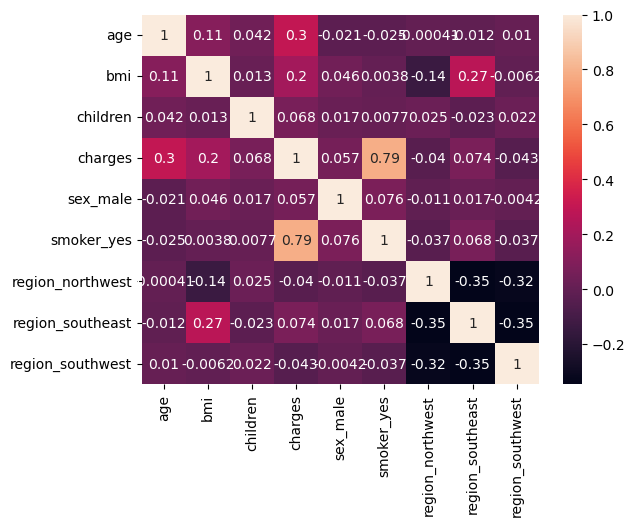

In [173]:
import seaborn as sns
sns.heatmap(correlations, annot = True)


I noticed that the smoker correlated highly with the charges. The age charges also correlated with the charges. Meaning the higher the age the greater the insurance will charge.

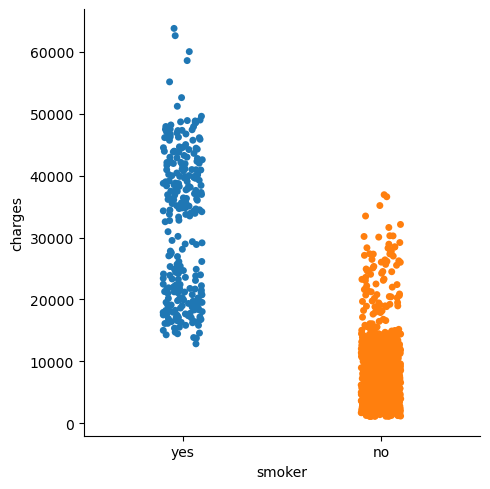

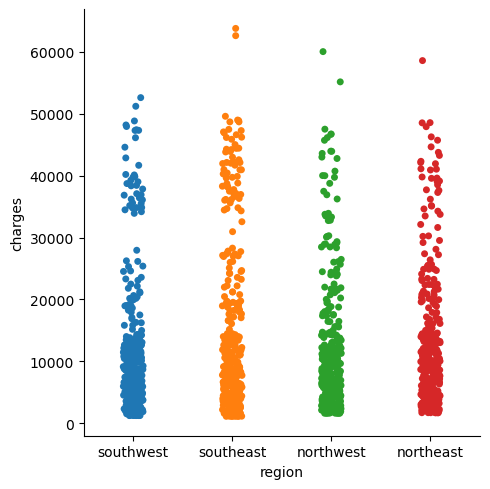

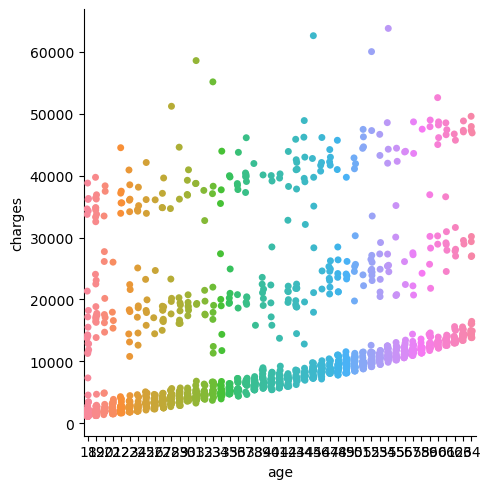

In [174]:
sns.catplot(data = df, x = 'smoker', y = 'charges' )
sns.catplot(data = df, x = 'region', y = 'charges' )
sns.catplot(data = df, x = 'age', y = 'charges' )
plt.show()

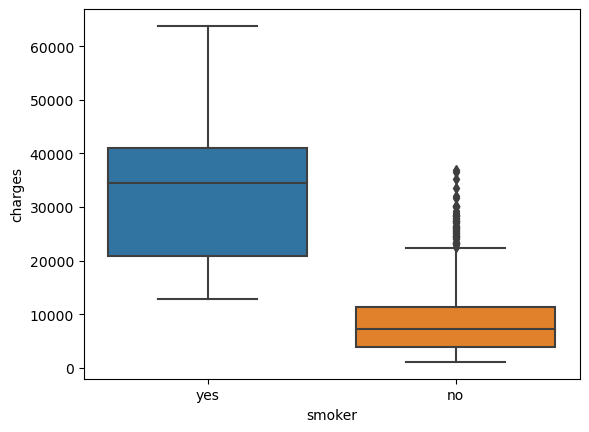

In [175]:
sns.boxplot(data = df, x = 'smoker', y = 'charges' )
plt.show()

In [176]:
dummy_df= dummy_df.drop(columns=['region_northwest', 'region_southeast', 'region_southwest'])

Since the Region column is not significant we will remove it from the data. Again we see that age and smoking does effect out data.

In [177]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.5)

In [178]:
scaler = MinMaxScaler()

In [179]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [180]:
lr = LinearRegression()

In [181]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [182]:
train_predictions = lr.predict(X_train_scaled)

In [183]:
MSE = mean_squared_error(y_train, train_predictions)
print(MSE)

36860915.51098296


In [184]:
RMSE = mean_squared_error(y_train, train_predictions, squared = False)
print(RMSE)

6071.319091514048


In [185]:
lr.score(X_train_scaled, y_train)

0.7419950237094928

In [186]:
train_predictions

array([ 9932.78551108, 34988.58873318, 17672.4183875 , 13311.86880903,
       27474.74629511,  7954.52713291, 11169.108668  ,  6647.32897544,
       14461.30974746,  -561.03129996, 13823.95781281, 35150.29121381,
        7670.54085391,  3128.36479275,  4648.10950619,  2367.47268887,
        2533.66210737, 15528.58944765,  2657.75395574, 31993.38701755,
        6083.29301943,  7179.22018802,  4046.6383061 , 12889.86497878,
        4708.41234646, 11470.82234763,  9960.21708752,  9797.45837797,
       39116.67928832, 29109.21040979,  9277.34095933, 25402.06161173,
        9094.34491796,  7111.20202627,  4092.35378585,  4850.19026883,
        9448.6909798 ,  3932.02928931, 12427.30296736,  -172.88729164,
        4725.80715599, 10564.49721751, 16791.15505626,   975.66285952,
        8897.63025295,  4161.30584139, 10031.66645824,  4761.73404073,
       15265.91062789,  8186.90638115,  1684.07273713, 11581.40331888,
        3246.98667607, 13693.48106625, 12316.11307833, 15870.98347046,
      

Text(0, 0.5, 'Residual')

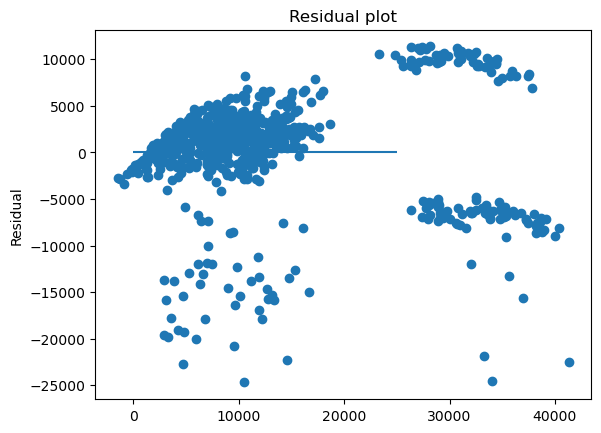

In [187]:
plt.scatter(train_predictions, train_predictions - y_train)
plt.hlines(y=0, xmin = 0, xmax = 25000) 
plt.title('Residual plot')
plt.ylabel('Residual')

We see from the Residual Plot that there are a lot of errors when the predictions for the charges are on the higher end IE: Over 25,000,

In [188]:
test_predictions = lr.predict(X_test_scaled)
test_predictions

array([ 8.84341100e+03,  1.23073958e+04,  6.24239237e+03,  1.19399019e+04,
        1.04526093e+04,  9.09741426e+03,  4.89355584e+03,  3.37263303e+04,
        1.48108708e+04,  1.30270407e+04,  2.93991342e+03,  7.24033341e+03,
        7.78901083e+03,  6.42794314e+03,  1.31930343e+04,  6.22483064e+03,
        9.84019077e+03,  1.04364102e+04,  8.32509071e+03,  1.06268622e+04,
        1.01094368e+04,  5.63828987e+03,  3.58193347e+04,  9.16456053e+03,
        2.93232174e+04,  2.09728977e+03,  1.24788089e+04,  1.60469665e+04,
        9.18168023e+03,  8.53305730e+03,  3.67979688e+03,  4.54416367e+03,
        1.27437081e+04,  1.43889651e+04,  8.60072684e+03,  2.26422020e+03,
        7.35719176e+03,  5.72836054e+03,  3.73368568e+03,  5.78407060e+03,
        7.18998006e+03, -7.49407266e+01,  3.02378218e+04,  2.96138596e+04,
        2.68246596e+04,  3.81645632e+04,  2.83658138e+03,  1.36013369e+04,
        2.84302194e+04,  1.37501759e+04,  7.84432625e+03,  3.97648971e+04,
        7.95058090e+03,  

Text(0, 0.5, 'Residual')

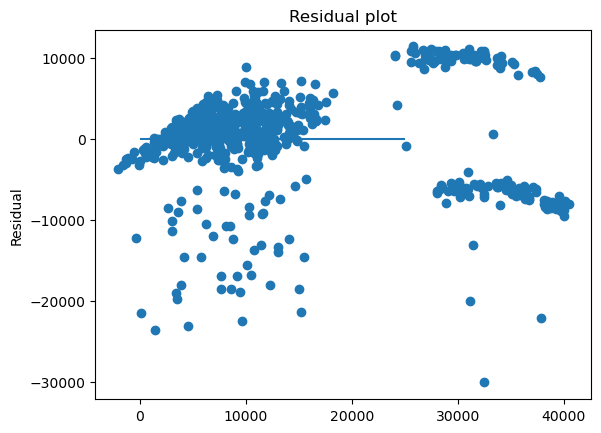

In [189]:
plt.scatter(test_predictions, test_predictions - y_test)
plt.hlines(y=0, xmin = 0, xmax = 25000) 
plt.title('Residual plot')
plt.ylabel('Residual')

Here I did a Residual plot again on the test as well. The results look similarly enough on the train set which is interesting to note.

In [ ]:
lr.coef_

In [191]:
lr.intercept_


-1151.0510007462672

In [192]:
lr.score(X_test_scaled, y_test)

0.756480265157122

In [ ]:
lr.score(X_train_scaled, y_test)

In [193]:
R2_score = r2_score(y_train, train_predictions)
print('The R square value for the train is ', R2_score)

The R square value for the train is  0.7419950237094928


In [194]:
R2_score = r2_score(y_train, test_predictions)
print('The R square value for the test is', R2_score)

The R square value for the test is -0.8374835398553857


In [200]:
MSE = mean_squared_error(y_test, test_predictions)
print(MSE)

36580300.65287978


In [202]:
MSE = mean_squared_error(y_test, train_predictions)
print(MSE)

255039593.8994538


In [ ]:
RMSE = mean_squared_error(y_test, train_predictions, squared = False)
print(RMSE)

15790.93123320631


The R2 score is showing that the train is doing better than the test meaning it's more accurate. Showing it's a good model. The model still can do better. I would try to look more into possibly splitting the data better and or cleaning the data better. We can try removing the BMI and children columns. 